In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Loading the data set

In [2]:
train= pd.read_csv("../input/digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv("../input/digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train= train["label"]
X_train= train.drop(labels= ["label"], axis=1)
# train datasının label sütunu Y_train' atansın 
# train datasından label sütununun çıkarılmış hali X_train'e atılsın

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

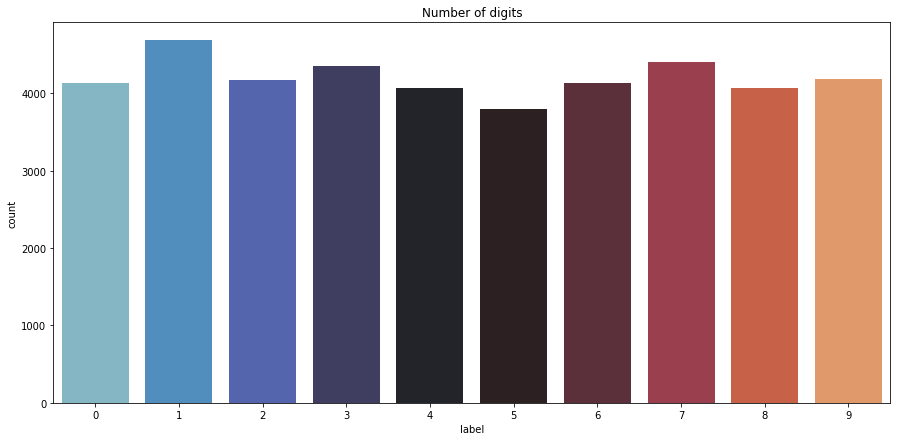

In [5]:
plt.figure(figsize=(15,7))
g= sns.countplot(Y_train, palette="icefire")
plt.title("Number of digits")
Y_train.value_counts()

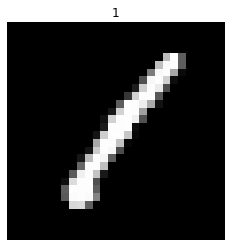

In [6]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

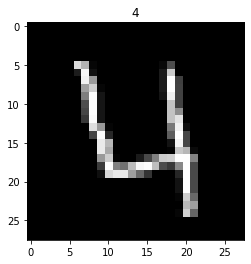

In [7]:
img= X_train.iloc[3].to_numpy()
img= img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("on")
plt.show()

## Normalization, Reshape and Label Encoding

#### Normalization
* Bir resmi normalize etmek demek onu gray scale içerisine almak demektir. Yani görsel siyah ve beyazdan oluşacaktır.
* Normalization yaparak CNN'in daha hızlı çalışmasını sağlarız.
<br>
<br>

#### Reshape
* Keras elimizde bulunan 28x28 yani 2 boyutlu matrisleri anlamlandıramaz.
* Bu yüzden 3D olarak kullanmalıyız. 28x28x1 , buradaki 1'in anlamı siyah beyaz olmasıdır yani gray scale'i temsil eder, renkli olsaydı 3 verilecekti. Çünkü RGB 3 renk değerine sahiptir.
<br>
<br>

#### Label Encoding
* Verideki label'larımızın binary temsil edilişi
    * 2 = [0,0,1,0,0,0,0,0,0,0]
    * 4 = [0,0,0,0,1,0,0,0,0,0]
* Örneğin 2 , 3.indexte bulunmaktadır. Çünkü indexleme 0.dan başlıyor.
* Encoding demek Label'ları farklı bir formata çevirmek anlamına gelmektedir.

In [8]:
# Normalize the data
# Normalization bir değeri 0-1 aralığına almak anlamına gelmektedir.
# Bu veri setinde resimler ile çalışıldığı için veriyi 255'e bölmek yeterli olacaktır çünkü
# bir resmin alabileceği max matematiksel değer 255'tir.
# Örneğin kırmızı rengin rgb kodu (255,0,0) maxiimum 255 değerini almıştır.
# bu yüzden x_train ve test'i 255'e bölerek normalize etmiş oluyoruz.

X_train= X_train/255.0
test= test/ 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ", test.shape)

# normalize etmek shape'te bir değişikliğe neden olmamaktadır.

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test= test.values.reshape(-1,28,28,1)
print("x_train shape:", X_train.shape)
print("test shape: ", test.shape)

# kaç sample olduğunu belirten bir değeri de içine alarak 4D'ye çeviriyoruz.

x_train shape: (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [10]:
# Label Encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes= 10)
# encoding yapılırken number of class belirtilmek zorunda

## Train Test Split
* test size is 10% , train size ise 90% .

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

# x_train ve x_validation olarak ayırdık
# x_train ile model oluşturacaz
# x_val ile model test edilecek
# gerçek hayatta kullanmaya hazır bir model elde edilecek 
# test ile de bu model test edilecek

x_train shape (37800, 28, 28, 1)
x_val shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_val shape (4200, 10)


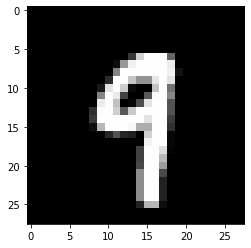

In [12]:
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.show()

## Creating Model 
* convolation -> max pooling -> dropout -> convoluation ->max pooling -> dropout -> fully connected (2 layer)

* Dropout: Forward propagation sırasında random olarak seçilmiş bazı nöronların train sırasında görmezden gelinmesidir. Bu seçilen nöronlarla bağlantılı olan nöronların arasındaki bağlantı kesilmektedir.

In [13]:
from sklearn.metrics import confusion_matrix 
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Tüm layer'ları içerisinde bulunduran yapı Sequential()'dır.
model= Sequential() 

# First layer
model.add(Conv2D(filters= 8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
# feature detect eden filtrelerin sayısının 8 olmasını istedik modelimizin daha hızlı çalışması için.
# kernel_size -> filtre size'ıdır.
# input_size görsel size'ı, ve yanına 1 eklenmesi de gray scale olduğunu belirtiyor, keras'ın anlamlandırabilmesi için.
model.add(MaxPool2D(pool_size=(2,2)))
# Max pooling'i ekledik 2x2 bir matris olsun dedik.
model.add(Dropout(0.25))
# %25 node'u deaktive et

# Second layer
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
# burada bir input shape verilmesine gerek yok çünkü bir önceki layer'da shape belirtildi.
# Orada belirtmemizin nedeni ilk layer olması ve initial değer vermemiz gerekmesidir. Yoksa model shape'i bilemez.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# strides kaç adım atlanarak matrisin gezileeğini göstermektedir.
model.add(Dropout(0.25))

# Fully Connected
model.add(Flatten())
# matrisi  düzleştirdik
model.add(Dense(256, activation="relu"))
# aktivasyonu relu olan bir hidden layer ekledik.
model.add(Dropout(0.5))
model.add(Dense(10, activation= "softmax"))
# bir tane de output layer ekledik.
# softmax -> sigmoid fonksiyonu gibi bir fonksiyon ve multiclasslar için kullanılıyor.

2022-08-28 22:03:03.355726: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


#### Define Optimizer
* Adam optimizer: Learning rate'i değiştirir.
     * Kod çalışırken eğer leraning rate çok küçükse ve cost'un min olmasını sağlayacak parametrelere hızlıca ulaşılamıyorsa learning rate'i değiştirir ve modeli hızlandırır. Tam tersi olarak eğer leraning rate çok büyükse bu sefer rate'i düşürüp hedefe ulaşılmasını sağlar.

In [14]:
optimizer= Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

#### Compile Model
<br><br>
<img src="https://i.ibb.co/qW299Dr/cce.jpg" alt="categorical_crossentropy"/>
<br><br>
* Loss fonksiyonu multiclass'ta bu formüle göre hesaplanmaktadır.

In [15]:
model.compile(optimizer= optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
# multiclass'a sahipsek categorical_crossentropy kullanırız. 
# doğru tahmin edilirse hata 0 , yanlış tahmin edilirse hata yüksek çıkar.
# metrics çıkan sonucun neye göre değerlendirileceğini belirtmektedir. burada accuracy'e göre değerlendirmekteyiz.

#### Epoch ve Batch Size
* 10 tane resim olduğunda batch size'ı 2 olarak belirlersek her seferinde forward ve backward propagation 2 resim ile yapılacak. Bu da toplam 5 batch yapılması anlamına gelmektedir. Çünkü bir batch için gereken size 2'dir. (10/2=5)
* Resimlerin 5 kere batch yapılması 1 epoch'a denk gelmektedir. 3 epoch yapıldığını düşünürsek, 3x5= 15 batch olacaktır.

In [16]:
epochs= 10 
batch_size= 250

# daha iyi sonuçlar elde edebilmek için epoch'un 3 yerine 10 olması daha iyidir.

#### Data Augmentation
* Overfitting'i önlemek için farklı tarzdaki, boyuttaki, rotasyondaki, farklı data setleri kendi data setimize eklememiz gerekir.
<br><br>
* Bu yüzden training datamızda küçük değişiklikler yaparak (örneğin zoom ya da rotasyon değişikliği) gerçek resmimize benzeyen farklı resimler üretmiş oluyoruz.

In [17]:
datagen= ImageDataGenerator(featurewise_center=False,  # input mean 0 olarak set edilmesin dedik
                            samplewise_center=False,   # her bir sample 0 olmasın
                            featurewise_std_normalization=False,  
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=5,        # rotation'u değiştirdik
                            zoom_range= 0.5,         # zoom, width ve height özelliklerini değiştirdik
                            width_shift_range=0.5,
                            height_shift_range=0.5,
                            horizontal_flip=False,
                            vertical_flip=False)
datagen.fit(X_train)
# keras kütüphanesinin data generator metodundaki parametreleri doldurarak bir görsel üretebiliriz.
# değiştirmek istediğimiz parametreleri ayarladıktan sonra x_train datamıza bu değişiklikleri uyguluyoruz.

#### Fit the Model
Modeli oluşturup train edeceğiz.

In [18]:
history= model.fit_generator(datagen.flow(X_train, Y_train, batch_size= batch_size), 
                             epochs= epochs,
                             validation_data= (X_val, Y_val),
                             steps_per_epoch= X_train.shape[0]//batch_size) 
                             # bölüm'ün sonucu steps_per_epoch olacak

2022-08-28 22:03:04.008627: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
151/151 [==============================] - 13s 82ms/step - loss: 2.2134 - accuracy: 0.1763 - val_loss: 1.7619 - val_accuracy: 0.3700
Epoch 2/10
151/151 [==============================] - 12s 78ms/step - loss: 1.8898 - accuracy: 0.3262 - val_loss: 1.2105 - val_accuracy: 0.6745
Epoch 3/10
151/151 [==============================] - 12s 80ms/step - loss: 1.7047 - accuracy: 0.4039 - val_loss: 0.9292 - val_accuracy: 0.7176
Epoch 4/10
151/151 [==============================] - 12s 78ms/step - loss: 1.5884 - accuracy: 0.4496 - val_loss: 0.6576 - val_accuracy: 0.8319
Epoch 5/10
151/151 [==============================] - 12s 82ms/step - loss: 1.5128 - accuracy: 0.4795 - val_loss: 0.5273 - val_accuracy: 0.8645
Epoch 6/10
151/151 [==============================] - 12s 78ms/step - loss: 1.4516 - accuracy: 0.5025 - val_loss: 0.4564 - val_accuracy: 0.8862
Epoch 7/10
151/151 [==============================] - 12s 78ms/step - loss: 1.3929 - accuracy: 0.5191 - val_loss: 0.3732 - val_accuracy:

#### Evaluate the Model
* Test loss görselleştirme.
* Confusion matrix.

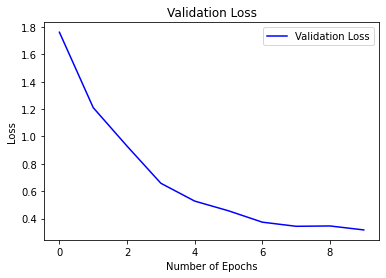

In [19]:
plt.plot(history.history['val_loss'], color='b', label="Validation Loss")
plt.title("Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

epoch sayısı arttıkça loss'un azaldığını görmekteyiz.

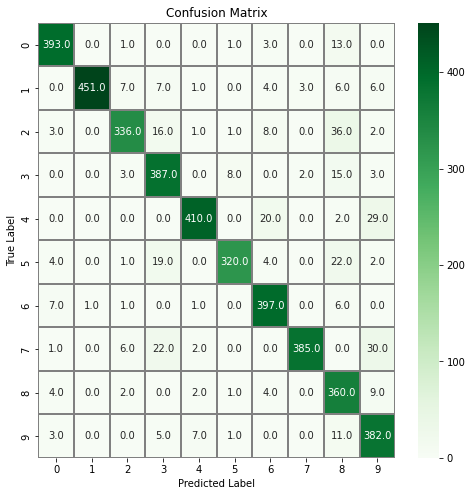

In [20]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

* Burada solda gözüken true label'ların heatmap'te kaç tanesinin doğru tahmin edildiğini görebiliyoruz. Örneğin 7 label'ı için 431 doğru tahmin alınmış.
* Ayrıca confusion matris olarak incelersek modelin 5 yerine 3 tahmini yaptığı olmuş 11 tane, 9 yerine 7 tahminini 22 kere yapmış yani bunları karıştırmış. Aynı şekilde 4 yerine 9 dediği olmuş.
* Bu sorunu ortadan kaldırmak için karıştırılan sayılar ile ilgili daha farklı image'lar ekleyerek modelin daha iyi eğitilmesini sağlayabiliriz.